In [1]:
import sys
sys.path.append('../../../src/')
from greens_function import *
from ansatze import *
from hamiltonians import *
from constants import *

/home/snsunx/anaconda3/envs/qiskit/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/home/snsunx/.local/lib/python3.8/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'


Ground state energy = -214.332 eV
Calculations of (N+/-1)-electron states finished.
m = 0
Statevector simulator mode.
m = 1
Statevector simulator mode.
m = 2
Statevector simulator mode.
m = 3
Statevector simulator mode.
m = 4
Statevector simulator mode.
m = 5
Statevector simulator mode.
m = 6
Statevector simulator mode.
m = 7
Statevector simulator mode.
m = 8
Statevector simulator mode.
m = 9
Statevector simulator mode.
m = 10
Statevector simulator mode.
m = 11
Statevector simulator mode.
Calculations of diagonal transition amplitudes finished.
(m, n) = (0, 1)
Statevector simulator mode.
(m, n) = (0, 2)
Statevector simulator mode.
(m, n) = (0, 3)
Statevector simulator mode.
(m, n) = (0, 4)
Statevector simulator mode.
(m, n) = (0, 5)
Statevector simulator mode.
(m, n) = (0, 6)
Statevector simulator mode.
(m, n) = (0, 7)
Statevector simulator mode.
(m, n) = (0, 8)
Statevector simulator mode.
(m, n) = (0, 9)
Statevector simulator mode.
(m, n) = (0, 10)
Statevector simulator mode.
(m, n) =

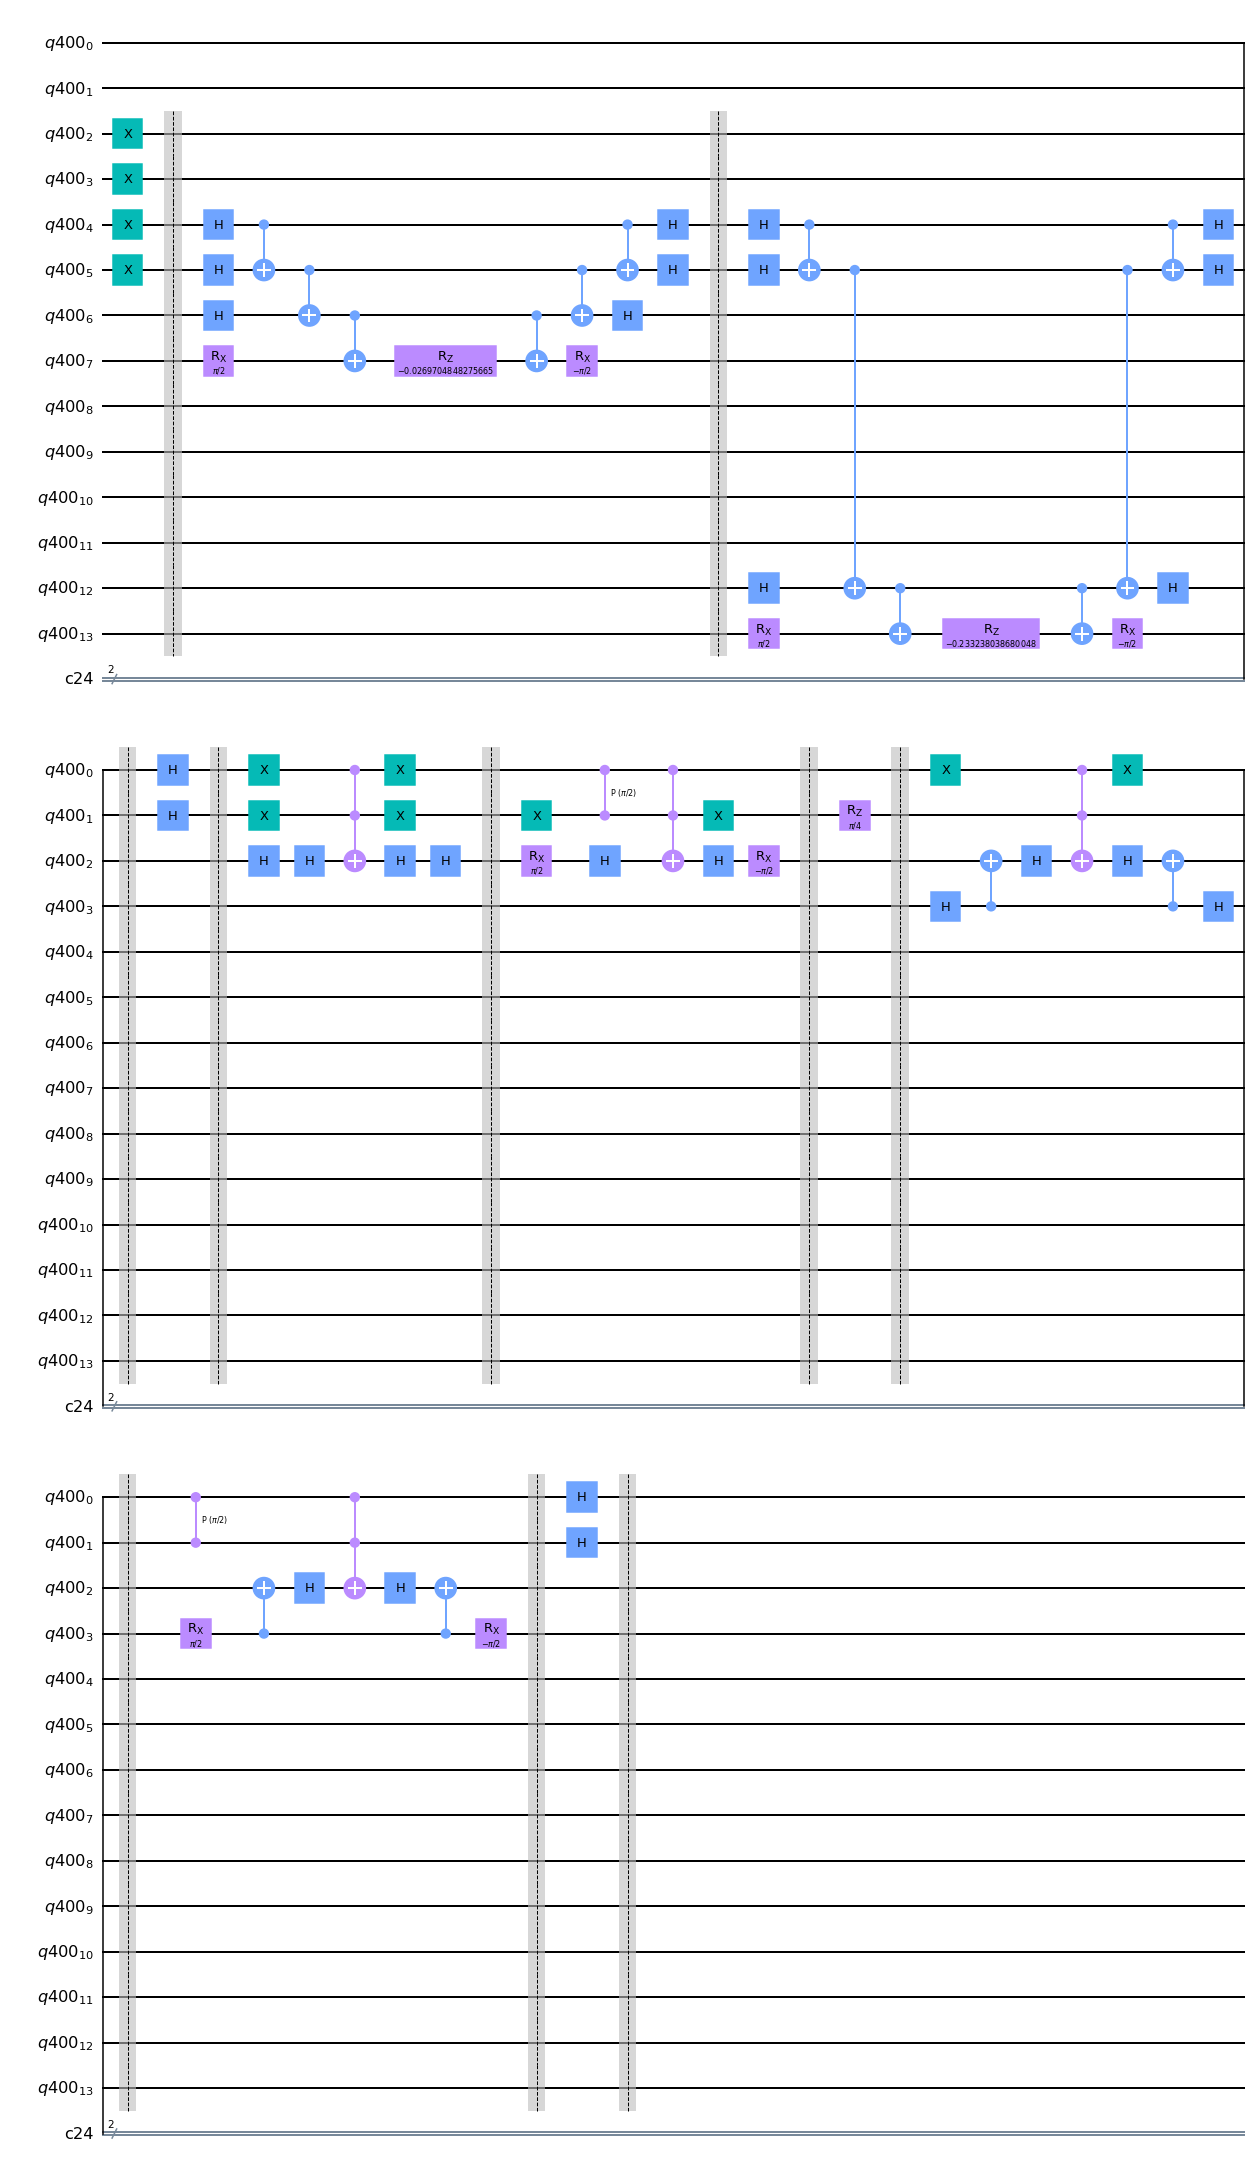

In [2]:
ansatz = build_kosugi_lih_ansatz(1)
hamiltonian = MolecularHamiltonian(
    [['Li', (0, 0, 0)], ['H', (0, 0, 1.6)]], 'sto3g')
greens_function = GreensFunction(ansatz, hamiltonian)
greens_function.compute_ground_state()
greens_function.compute_eh_states()
greens_function.compute_diagonal_amplitudes()
greens_function.compute_off_diagonal_amplitudes()

E1, E2 = greens_function.compute_correlation_energy()

In [3]:
E2

(-0.9096929440585674-0.0011411499408162775j)

In [ ]:
for i in range(1):
    e_qp = greens_function.energy_gs - greens_function.energies_h[i] + 1e-11
    print('e_qp =', e_qp)
    G = gf.compute_greens_function(e_qp)
    #np.linalg.pinv(G)
    print(np.linalg.cond(G))
    u, s, vt = np.linalg.svd(G)
    print(s)
    #gf.compute_self_energy(e_qp)

In [ ]:
gf = greens_function

E2 = 0
for i in range(gf.n_h):
    e_qp = gf.energy_gs - gf.energies_h[i]
    print(e_qp)
    Sigma = gf.compute_self_energy(e_qp)
    E2 += np.trace(Sigma @ self.B_h[:,:,i]) / 2

In [ ]:
np.diag(greens_function.h + greens_function.e_orb)

In [ ]:
greens_function.energy_gs - greens_function.energies_h

In [ ]:
greens_function.molecule.hf_energy